<a href="https://colab.research.google.com/github/D1emonk/My-repo/blob/main/lesson15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Среднеквадратичная ошибка (MSE)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y_true = np.array([3, 5, 2.5, 7])
y_pred = np.array([2.5, 5, 4, 8])

mse = np.mean((y_true - y_pred) ** 2)
mse

0.875

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error

y_true = np.array([3, 5, 2.5, 7])
y_pred = np.array([2.5, 5, 4, 8])
mean_squared_error(y_true, y_pred)

0.875

<h1>Средняя абсолютная ошибка (MAE)

In [ ]:
y_true = np.array([3, 5, 2.5, 7])
y_pred = np.array([2.5, 5, 4, 8])

mse = np.mean(np.abs(y_true - y_pred))
mse

0.75

In [ ]:
from sklearn.metrics import mean_absolute_error
y_true = np.array([3, 5, 2.5, 7])
y_pred = np.array([2.5, 5, 4, 8])
mean = mean_absolute_error(y_true, y_pred)
mean

0.75

<h1>Cross-Entropy Loss

<h2>Многоклассовая Cross-Entropy

In [ ]:
def cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

y_true = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred = np.array([[0.9, 0.1, 0.0], [0.2, 0.7, 0.1], [0.1, 0.3, 0.6]])
multiclass = cross_entropy(y_true, y_pred)
multiclass

0.3242870277875165

<h2>Binary Cross-Entropy

In [ ]:
def binary_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)  # Чтобы избежать log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

y_true = np.array([1, 0, 1])
y_pred = np.array([0.9, 0.1, 0.8])
binary = binary_cross_entropy(y_true, y_pred)
binary

0.14462152754328741

<h1>F1-Score

In [ ]:
from sklearn.metrics import f1_score

y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1]

f1 = f1_score(y_true, y_pred, average='binary')
f1

0.8

<h1> Log Cosh Loss

In [ ]:
def log_cosh_loss(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    error = y_pred - y_true
    return np.mean(np.log(np.cosh(error)))

    true_values = [3.0, -0.5, 2.0, 7.0]
    predicted_values = [2.5, 0.0, 2.0, 8.0]

    loss = log_cosh_loss(true_values, predicted_values)
    loss

<h1> Accuracy (Точность)

In [ ]:
from sklearn.metrics import accuracy_score

y_true = [0, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1]

accuracy = accuracy_score(y_true, y_pred)
accuracy

0.8

<H1> Линейная регрессия

Epoch 0: Loss = 27.4740
Epoch 100: Loss = 0.3719
Epoch 200: Loss = 0.2524
Epoch 300: Loss = 0.2336
Epoch 400: Loss = 0.2307
Epoch 500: Loss = 0.2302
Epoch 600: Loss = 0.2301
Epoch 700: Loss = 0.2301
Epoch 800: Loss = 0.2301
Epoch 900: Loss = 0.2301
Optimized Weights: [3.13879008 1.92099456 5.28497382]
Optimized Bias: -0.13220087581184858


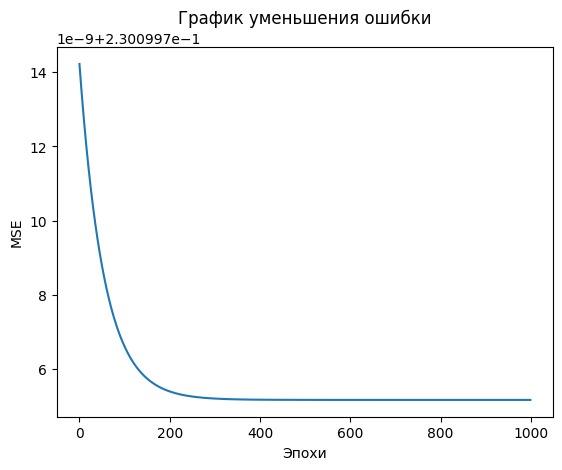

In [ ]:
# Генерация случайных данных
np.random.seed(42)
X = np.random.rand(100, 3)
y = 3*X[:, 0] + 2*X[:, 1] + 5*X[:, 2] + np.random.randn(100) * 0.5

# Гиперпараметры
learning_rate = 0.1
num_epochs = 1000
m, n = X.shape  # Количество примеров и признаков

# Инициализация параметров
W = np.random.randn(n)
b = np.random.randn()

# Градиентный спуск
for epoch in range(num_epochs):
    y_pred = X.dot(W) + b  # Предсказания
    error = y_pred - y  # Ошибка

    # Градиенты
    dW = (2/m) * X.T.dot(error)
    db = (2/m) * np.sum(error)

    # Обновление параметров
    W -= learning_rate * dW
    b -= learning_rate * db

    # Вывод ошибки каждые 100 итераций
    if epoch % 100 == 0:
        loss = np.mean(error ** 2)
        print(f'Epoch {epoch}: Loss = {loss:.4f}')

# Вывод итоговых параметров
print("Optimized Weights:", W)
print("Optimized Bias:", b)

#Визуализация процесса обучения
loss_history = []

for epoch in range(num_epochs):
    y_pred = X.dot(W) + b
    error = y_pred - y
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    dW = (2/m) * X.T.dot(error)
    db = (2/m) * np.sum(error)

    W -= learning_rate * dW
    b -= learning_rate * db

plt.plot(range(num_epochs), loss_history)
plt.xlabel('Эпохи')
plt.ylabel('MSE')
plt.title('График уменьшения ошибки')
plt.show()